In [1]:
import pandas as pd
import numpy as np
import csv
import pickle
from collections import Counter
import matplotlib.pyplot as plt
import powerlaw,math
import os
import scipy.stats as stats
import random
from numpy import polyfit, poly1d
import math
import seaborn as sns

In [6]:
Data = {'chemistry':{'Survival':{'BigOrSmall':(-1.250,'***'),'First5YearPubsOfMentee':(0.092,'***'),
                                'YearlyPubsOfMentor':(-0.258,'***'),'CareerAgeOfMentor':(0.008,'*')},
                     
                     'NumOfMenteesOfTheMenteeIn25':{'BigOrSmall':(2.996,'***'),'First5YearPubsOfMentee':(0.000,''),
                                                    'YearlyPubsOfMentor':(0.611,'***'),'CollaPubsWithMentor':(0.156,'***'),
                                                     'CareerAgeOfMentor':(0.143,'***')},
                     
                    'Top 5%':{'BigOrSmall':(0.344,'*'),'First5YearPubsOfMentee':(0.000,''),
                              'CollaPubsWithMentor':(0.047,'***')}
                    },
        
        'physics':{'Survival':{'BigOrSmall':(-1.211,'***'),'First5YearPubsOfMentee':(0.041,'***'),
                                'YearlyPubsOfMentor':(-0.171,'***'),'CareerAgeOfMentor':(-0.012,'**')},
                     
                     'NumOfMenteesOfTheMenteeIn25':{'BigOrSmall':(0.690,'***'),'First5YearPubsOfMentee':(0.018,'*'),
                                                    'YearlyPubsOfMentor':(0.764,'***'),'CollaPubsWithMentor':(0.207,'***'),
                                                     'CareerAgeOfMentor':(0.056,'***')},
                     
                    'Top 5%':{'BigOrSmall':(0.662,'*'),'First5YearPubsOfMentee':(0.047,'***'),
                              'CollaPubsWithMentor':(0.000,'')}},

        'neuro':{'Survival':{'BigOrSmall':(-1.310,'***'),'First5YearPubsOfMentee':(0.091,'***'),
                                'YearlyPubsOfMentor':(-0.285,'*'),'CareerAgeOfMentor':(0.021,'***')},
                     
                     'NumOfMenteesOfTheMenteeIn25':{'BigOrSmall':(0.649,'***'),'First5YearPubsOfMentee':(0.088,'***'),
                                                    'YearlyPubsOfMentor':(0.000,''),'CollaPubsWithMentor':(0.095,'**'),
                                                     'CareerAgeOfMentor':(0.000,'')},
                     
                    'Top 5%':{'BigOrSmall':(0.000,''),'First5YearPubsOfMentee':(0.003,'*'),
                              'CollaPubsWithMentor':(0.010,'***')}
                        }
            }
          

In [44]:
Std_error = {'chemistry':{'Survival':{'BigOrSmall':0.074,'First5YearPubsOfMentee':0.006,
                                'YearlyPubsOfMentor':0.049,'CareerAgeOfMentor':0.004},
                     
                     'NumOfMenteesOfTheMenteeIn25':{'BigOrSmall':0.453,'First5YearPubsOfMentee':0.000,
                                                    'YearlyPubsOfMentor':0.212,'CollaPubsWithMentor':0.038,
                                                     'CareerAgeOfMentor':0.024},
                     
                    'Top 5%':{'BigOrSmall':0.187,'First5YearPubsOfMentee':0.000,
                              'CollaPubsWithMentor':0.013}
                    },
        
        'physics':{'Survival':{'BigOrSmall':0.099,'First5YearPubsOfMentee':0.007,
                                'YearlyPubsOfMentor':0.037,'CareerAgeOfMentor':0.006},
                     
                     'NumOfMenteesOfTheMenteeIn25':{'BigOrSmall':0.315,'First5YearPubsOfMentee':0.009,
                                                    'YearlyPubsOfMentor':0.188,'CollaPubsWithMentor':0.035,
                                                     'CareerAgeOfMentor':0.020},
                     
                    'Top 5%':{'BigOrSmall':0.353,'First5YearPubsOfMentee':0.013,
                              'CollaPubsWithMentor':0.000}},

        'neuro':{'Survival':{'BigOrSmall':0.113,'First5YearPubsOfMentee':0.017,
                                'YearlyPubsOfMentor':0.110,'CareerAgeOfMentor':0.009},
                     
                     'NumOfMenteesOfTheMenteeIn25':{'BigOrSmall':0.335,'First5YearPubsOfMentee':0.035,
                                                    'YearlyPubsOfMentor':0.000,'CollaPubsWithMentor':0.039,
                                                     'CareerAgeOfMentor':0.000},
                     
                    'Top 5%':{'BigOrSmall':0.000,'First5YearPubsOfMentee':0.002,
                              'CollaPubsWithMentor':0.003}
                        }
            }
          

[0.074 0.006 0.049 0.004]
[0.099 0.007 0.037 0.006]
[0.113 0.017 0.11  0.009]


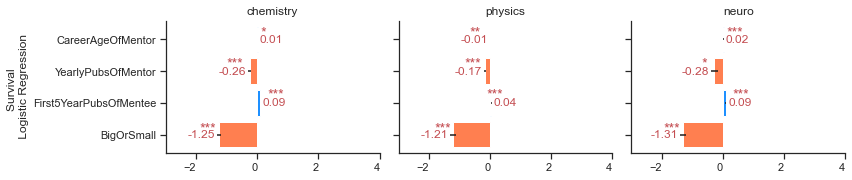

In [133]:
sns.set(style='ticks', font_scale=1, font='Arial')
fig = plt.figure(figsize=(12,4*4/6),tight_layout=1)
field = ['chemistry','physics','neuro']
for i in range(3):
#第一行 (the first row)：Survival
    ax = fig.add_subplot(1,3,i+1)
    Data_chem = Data[field[i]]['Survival']
    x_error = Std_error[field[i]]['Survival']
    xerror = np.array([k for k in x_error.values()])
    
    x0_ticks = [k for k in Data_chem.keys()]
    x0 = list(range(len(x0_ticks)))
    y0 = np.array([k[0] for k in Data_chem.values()])
    
    print(xerror)
    #显著性示例 (significance marks)
    xingxing = [k[1] for k in Data_chem.values()]
    HGT_xx = np.array(range(len(x0_ticks)))*1.02
    HGT_xx[0] = 0.1;HGT_xx[1] = 1.05
    Colors = []
    y1 = []
#     xerror = []
    for k in y0:
        if k>0:
            Colors.append('dodgerblue')
#             y1.append(math.sqrt(k*10))
            y1.append(k)
        elif k == 0:
            Colors.append('white')
            y1.append(0)
        else:
            Colors.append('coral')
#             y1.append(-math.sqrt((-k)*10))
            y1.append(k)
#         xerror.append(0.5)
        
    hbars = ax.barh(x0_ticks, y1,color=Colors,xerr=xerror,align='center')
    labels = ax.get_xticklabels()
    plt.setp(labels, rotation=0, horizontalalignment='right')
    ax.bar_label(hbars, labels=['%.2f' % e for e in y0],padding=2, color='r', fontsize=12)
    if i==0:
        ax.set_ylabel('Survival \n Logistic Regression')
#     ax.set_xlabel('Logistic Regression')
    ax.set_title(field[i])
    ax.set_xlim([-3,4])
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
#     ax.spines['bottom'].set_visible(False)
    Y_ticks = ['','','','']
    if i>0:
        ax.set_yticks(ticks=[0,1,2,3],labels=Y_ticks)
    ii = 0
    ax.text(y1[ii]*1.1, HGT_xx[ii]*1.7, xingxing[ii], 
                    fontsize=14, color = "r", style = "italic", weight = "light",
                    verticalalignment='center', horizontalalignment='right',rotation=0)        
    ii = 1
    ax.text(y1[ii]*9, HGT_xx[ii]*1.2, xingxing[ii], 
                    fontsize=14, color = "r", style = "italic", weight = "light",
                    verticalalignment='center', horizontalalignment='right',rotation=0) 
    ii = 2
    ax.text(y1[ii]*2, HGT_xx[ii]*1.1, xingxing[ii], 
                    fontsize=14, color = "r", style = "italic", weight = "light",
                    verticalalignment='center', horizontalalignment='right',rotation=0) 
    ii = 3
    ax.text(y1[ii]*30, HGT_xx[ii]*1.05, xingxing[ii], 
                    fontsize=14, color = "r", style = "italic", weight = "light",
                    verticalalignment='center', horizontalalignment='right',rotation=0) 
fig.savefig('regression_survival.pdf')

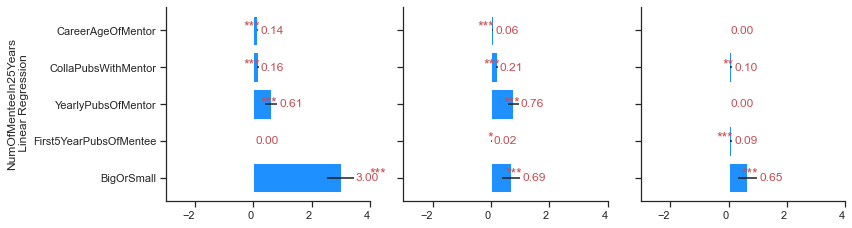

In [132]:
sns.set(style='ticks', font_scale=1, font='Arial')
fig = plt.figure(figsize=(12,5*4/6),tight_layout=1)
field = ['chemistry','physics','neuro']
for i in range(3):
    
#第二行(the second row)： NoOfMenteeIn25Years
    ax = fig.add_subplot(1,3,i+1)
    Data_chem = Data[field[i]]['NumOfMenteesOfTheMenteeIn25']
    x0_ticks = [k for k in Data_chem.keys()]
    x0 = list(range(len(x0_ticks)))
    y0 = np.array([k[0] for k in Data_chem.values()])
    x_error = Std_error[field[i]]['NumOfMenteesOfTheMenteeIn25']
    xerror = np.array([k for k in x_error.values()])
    #显著性示例 (sigificance marks)
    xingxing = [k[1] for k in Data_chem.values()]
    HGT_xx = np.array(range(len(x0_ticks)))*1.02
    HGT_xx[0] = 0.1;HGT_xx[1] = 1.05
    Colors = []
    y1 = []
#     xerror = []
    for k in y0:
        if k>0:
            Colors.append('dodgerblue')

            y1.append(k)

        elif k == 0:
            Colors.append('white')
            y1.append(0)
        else:
            Colors.append('coral')
            y1.append(k)
#         xerror.append(0.5)
        
    hbars = ax.barh(x0_ticks, y1,color=Colors,xerr=xerror,align='center')
    labels = ax.get_xticklabels()
    plt.setp(labels, rotation=0, horizontalalignment='right')
    ax.bar_label(hbars, labels=['%.2f' % e for e in y0],padding=2, color='r')
    if i==0:
        ax.set_ylabel('NumOfMenteeIn25Years\n Linear Regression')
#     ax.set_xlabel('Linear Regression')
#     ax.set_title(field[i])
    ax.set_xlim([-3,4])
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
#     ax.spines['bottom'].set_visible(False)
    Y_ticks = ['','','','','']
    if i>0:
        ax.set_yticks(ticks=[0,1,2,3,4],labels=Y_ticks)

    ii = 0
    ax.text(y1[ii]*1.5, HGT_xx[ii]*1.1, xingxing[ii], 
                    fontsize=14, color = "r", style = "italic", weight = "light",
                    verticalalignment='center', horizontalalignment='right',rotation=0) 

    ii = 1
    ax.text(y1[ii]*1.12, HGT_xx[ii]*1.03, xingxing[ii], 
                    fontsize=14, color = "r", style = "italic", weight = "light",
                    verticalalignment='center', horizontalalignment='right',rotation=0)        

    ii = 2
    ax.text(y1[ii]*1.25, HGT_xx[ii], xingxing[ii], 
                    fontsize=14, color = "r", style = "italic", weight = "light",
                    verticalalignment='center', horizontalalignment='right',rotation=0) 
    ii = 3
    ax.text(y1[ii]*1.30, HGT_xx[ii], xingxing[ii], 
                    fontsize=14, color = "r", style = "italic", weight = "light",
                    verticalalignment='center', horizontalalignment='right',rotation=0) 
   
    ii = 4
    ax.text(y1[ii]*1.30, HGT_xx[ii], xingxing[ii], 
                    fontsize=14, color = "r", style = "italic", weight = "light",
                    verticalalignment='center', horizontalalignment='right',rotation=0) 
    
fig.savefig('regression_numofmenteein25.pdf')

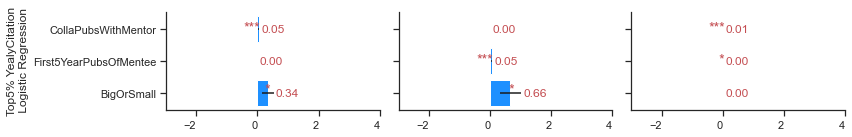

In [131]:
sns.set(style='ticks', font_scale=1, font='Arial')
fig = plt.figure(figsize=(12,4*3/6),tight_layout=1)
field = ['chemistry','physics','neuro']
for i in range(3):
    
#第三行(the third row)： NoOfMenteeIn25Years
    ax = fig.add_subplot(1,3,i+1)
    Data_chem = Data[field[i]]['Top 5%']
    x0_ticks = [k for k in Data_chem.keys()]
    x0 = list(range(len(x0_ticks)))
    y0 = np.array([k[0] for k in Data_chem.values()])
    x_error = Std_error[field[i]]['Top 5%']
    xerror = np.array([k for k in x_error.values()])
    #显著性示例 (significance marks)
    xingxing = [k[1] for k in Data_chem.values()]
    HGT_xx = np.array(range(len(x0_ticks)))*1.02
    HGT_xx[0] = 0.1;HGT_xx[1] = 1.05
    Colors = []
    y1 = []
#     xerror = []
    for k in y0:
        if k>0:
            Colors.append('dodgerblue')
#             y1.append(math.sqrt(k*10))
            y1.append(k)
        elif k == 0:
            Colors.append('white')
            y1.append(0)
        else:
            Colors.append('coral')
            y1.append(k)
#             y1.append(-math.sqrt((-k)*10))
#         xerror.append(0.5)
        
    hbars = ax.barh(x0_ticks, y1,color=Colors,xerr=xerror,align='center')
    labels = ax.get_xticklabels()
    plt.setp(labels, rotation=0, horizontalalignment='right')
    ax.bar_label(hbars, labels=['%.2f' % e for e in y0],padding=2, color='r')
    if i==0:
        ax.set_ylabel('Top5% YealyCitation\n Logistic Regression')
#     ax.set_xlabel('Logit Regression')
#     ax.set_title(field[i])
    ax.set_xlim([-3,4])
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
#     ax.spines['bottom'].set_visible(False)
    Y_ticks = ['','','']
    if i>0:
#         ax.spines['left'].set_visible(False)
#         ax.set_xticks([])
        ax.set_yticks(ticks=[0,1,2],labels=Y_ticks)
#     ax.set_xticks() 
    
    manually = [0]
    for ii in range(len(x0_ticks)):
        if ii not in manually:
            ax.text(y1[ii]*1.35, HGT_xx[ii], xingxing[ii], 
                    fontsize=14, color = "r", style = "italic", weight = "light",
                    verticalalignment='center', horizontalalignment='right',rotation=0) 
    ii = 0
    ax.text(y1[ii]*1.10, HGT_xx[ii]*1.03, xingxing[ii], 
                    fontsize=14, color = "r", style = "italic", weight = "light",
                    verticalalignment='center', horizontalalignment='right',rotation=0) 
fig.savefig('regression_top5.pdf')  